**Task 2: Разделяющие границы**

In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2


In [ ]:
pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Препроцессинг данных и визуализация работы логрегрессии**

**Прочитайте файл `am_pm.csv` с прошлого задания в датафрейм.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 1: Бинарный классификатор/data/am_pm.csv')
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


**Нарисуйте график, где ось икс – это am, а ось игрек – это pm. Каждая точка – это конкретный день. Рабочие дни и выходные должны иметь разные цвета на графике.**

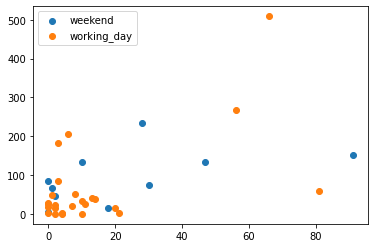

In [ ]:
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()

**Добавьте разделяющие границы (decision boundaries) логрегрессии на график.**

In [ ]:
logreg_fit = LogisticRegression(C=1.0, 
                            fit_intercept=False, 
                            random_state=21,
                            max_iter=100).fit(df[['am', 'pm']], df.target)

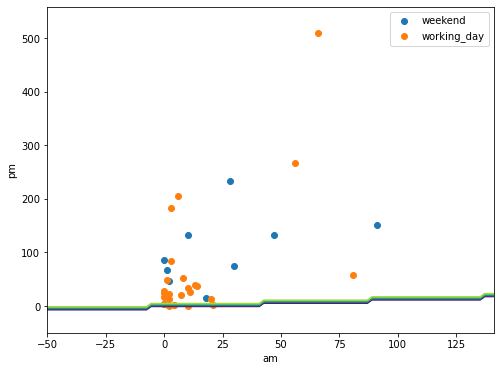

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=logreg_fit,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=50, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

**Нарисуйте точно такой же график, но теперь цвет зависит от значения столбца с прогнозом.**

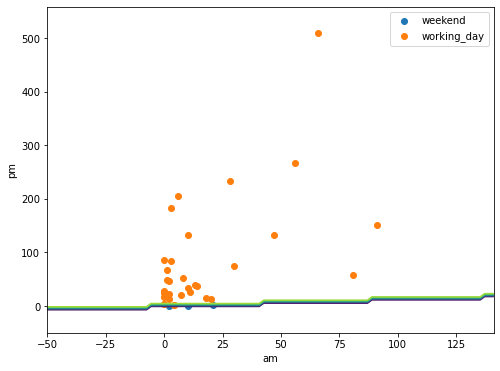

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("predict")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=logreg_fit,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=50, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

Теперь вам должно стать понятно, как работает логистическая регрессия.

**2. Стандартизация и логрегрессия**

Линейные модели могут быть чувствительны к шкалам ваших признаков. Чтобы снизить эту чувствительность и повысить вероятность более точного прогноза, как вы уже знаете, лучше шкалы ваших признаков стандартизировать.

1. Примените `StandardScaler` к признакам и заново обучите логистическую регрессию, используя те же самые параметры.

In [ ]:
df[['am', 'pm']] = StandardScaler().fit_transform(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,weekend
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day
5,2020-04-22,working_day,-0.698744,-0.464599,working_day
6,2020-04-23,working_day,-0.270442,-0.415502,working_day
7,2020-04-24,working_day,-0.613084,-0.602071,working_day
8,2020-04-25,weekend,0.586162,-0.012906,working_day
9,2020-04-26,weekend,0.500501,1.548382,working_day


In [ ]:
logreg_fit = LogisticRegression(C=1.0, 
                            fit_intercept=False, 
                            random_state=21,
                            max_iter=100).fit(df[['am', 'pm']], df.target)
df['predict'] =  logreg_fit.predict(df[['am', 'pm']])

2. Посчитайте `accuracy` для новой модели. Теперь модель стала лучше наивного прогноза с самым популярным классом в качестве значения?

In [ ]:
logreg_fit.score(df[['am', 'pm']], df.target)

0.7428571428571429

3. Нарисуйте снова графики, как выше, но только для новой модели.

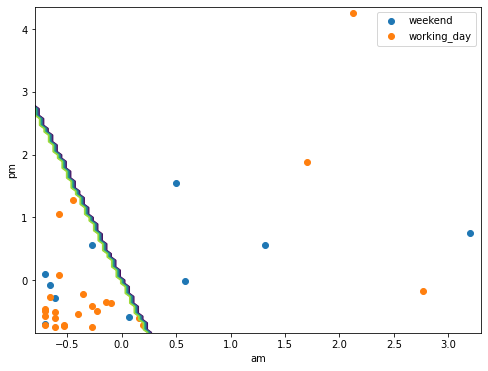

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=logreg_fit,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

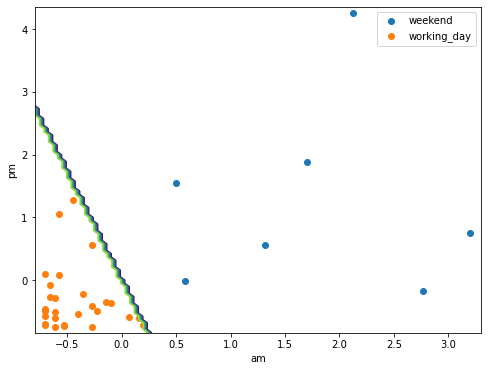

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("predict")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=logreg_fit,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

**3. SVM**

1. Обучите модель `SVC`(классификатор на основе метода опорных векторов), используя стандартизированные признаки, и принимая во внимание параметры `probability=True`, `random_state=21`.

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='linear', 
              degree=3, 
              gamma='scale', 
              coef0=0.0, 
              shrinking=True, 
              probability=True, 
              random_state=21).fit(df[['am', 'pm']], df.target)

2. Посчитайте `accuracy`.

In [ ]:
svc_fit.score(df[['am', 'pm']], df.target)

0.7142857142857143

3. Попробуйте разные кернелы и найдите лучший с точки зрения этой метрики.

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='sigmoid', 
              gamma='scale', 
              coef0=0.0, 
              shrinking=True, 
              probability=True, 
              random_state=21).fit(df[['am', 'pm']], df.target)

svc_fit.score(df[['am', 'pm']], df.target)

0.6857142857142857

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='rbf', 
              gamma='scale', 
              coef0=0.0, 
              shrinking=True, 
              probability=True, 
              random_state=21).fit(df[['am', 'pm']], df.target)

svc_fit.score(df[['am', 'pm']], df.target)

0.7428571428571429

In [ ]:
grid = {'kernel': ['linear', 'poly'],
              'C':[0.1, 1, 10],
             'coef0': [-10, -1, 0, 1, 10]}

In [ ]:
clf = SVC(gamma='scale', 
          shrinking=True, 
          probability=True, 
          random_state=21)

best_score = 0
for g in ParameterGrid(grid):
    clf.set_params(**g)
    clf.fit(df[['am', 'pm']], df.target)
    score = clf.score(df[['am', 'pm']], df.target)
    # save if best
    if score > best_score:
        best_score = score
        best_grid_forest = g   

estimator = SVC(degree=3, 
              gamma='scale', 
              shrinking=True, 
              probability=True, 
              random_state=21)

svc_grid = GridSearchCV(estimator=estimator,
                        param_grid=parameters,
                        scoring='accuracy', 
                        cv=5).fit(df[['am', 'pm']], df.target)

In [ ]:
score

0.8571428571428571

In [ ]:
g

{'C': 10, 'coef0': 10, 'kernel': 'poly'}

In [ ]:
best_svc = clf.set_params(**g)

4. Нарисуйте снова два графика вместе с разделяющими границами, но уже для этого алгоритма, чтобы увидеть, каким образом работает он.

NameError: ignored

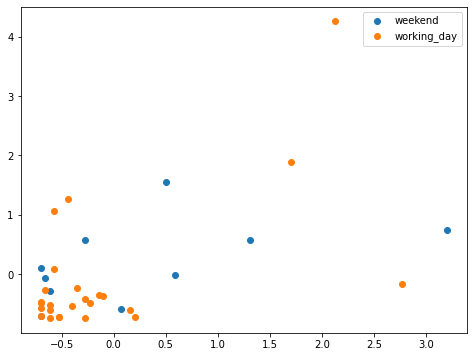

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=best_svc,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

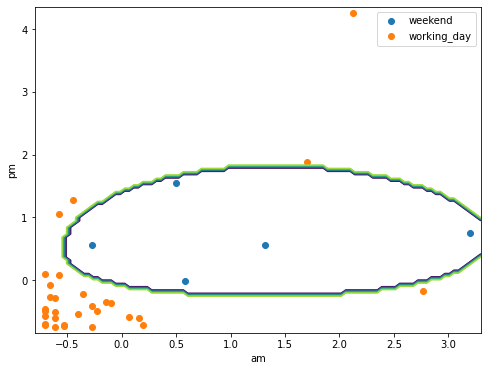

In [ ]:
df['predict'] =  best_svc.predict(df[['am', 'pm']])
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("predict")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=best_svc,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

## 4. Дерево классификаций

1. Обучите `DecisionTreeClassifier` на стандартизированных признаках, используя параметры `max_depth=4`, `random_state=42`.

In [ ]:
tree_fit_4 = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=4,
                                  random_state=42
                                  ).fit(df[['am', 'pm']], df.target)

2. Посчитайте accuracy.

In [ ]:
tree_fit_4.score(df[['am', 'pm']], df.target)

0.9428571428571428

3. Попробуйте различные значения `max_depth`.

In [ ]:
tree_fit_10 = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=10,
                                  random_state=42
                                  ).fit(df[['am', 'pm']], df.target)

tree_fit_10.score(df[['am', 'pm']], df.target)

1.0

In [ ]:
tree_fit_None = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=None,
                                  random_state=42
                                  ).fit(df[['am', 'pm']], df.target)

tree_fit_None.score(df[['am', 'pm']], df.target)

1.0

4. Нарисуйте снова оба графика с разделяющими границами, чтобы увидеть как работает этот алгоритм.

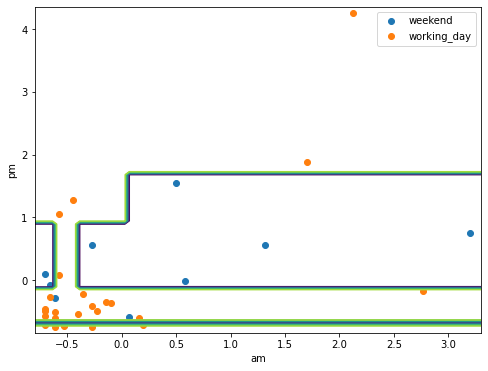

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=tree_fit_4,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

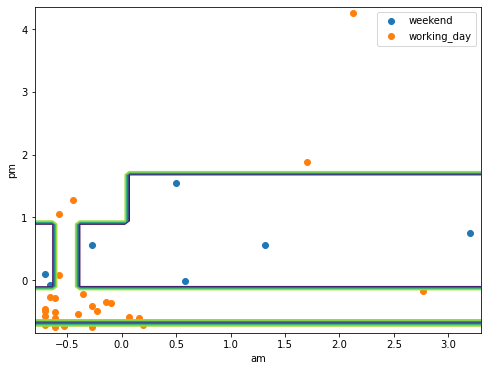

In [ ]:
df['predict'] =  tree_fit_4.predict(df[['am', 'pm']])
fig, ax = plt.subplots(figsize = (8, 6))
groups = df.groupby("predict")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()
boundary = DecisionBoundaryDisplay.from_estimator(estimator=tree_fit_4,
                                                  X = df[['am', 'pm']],
                                                  grid_resolution=100,
                                                  eps=0.1, 
                                                  plot_method='contour', 
                                                  response_method='predict', 
                                                  xlabel='am', 
                                                  ylabel='pm',
                                                  ax=ax)

5. Воспользуйтесь методом `.plot_tree()`, чтобы визуализировать само дерево. Это еще один способ понять то, как работает этот алгоритм.

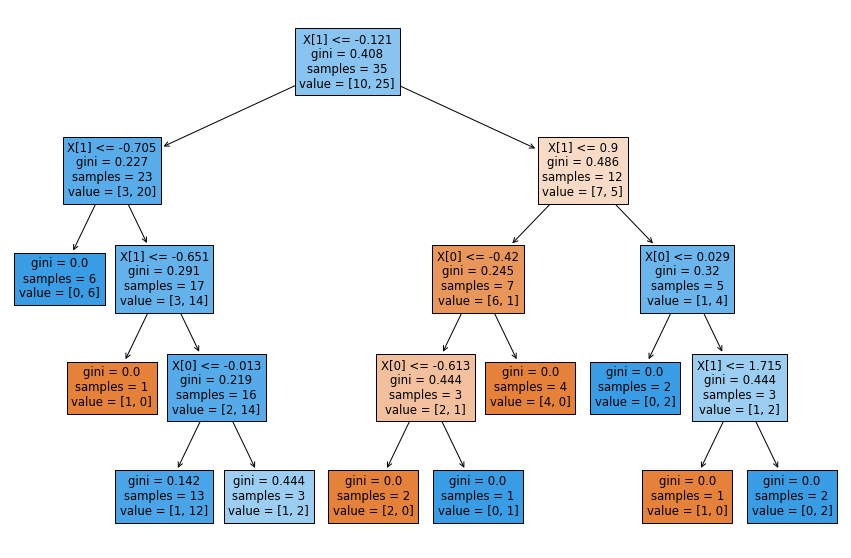

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(tree_fit_4,
         filled=True);

6. Сколько "листков" в визуализированном дереве пометили дни как `working_day`? Впишите свой ответ в markdown-ячейку в конце этой секции.

6 (4 - это для выходных. См. ниже)

In [ ]:
df.predict.value_counts()

working_day    27
weekend         8
Name: predict, dtype: int64